In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("loan_data.csv")

In [2]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.711286
N    0.288714
Name: proportion, dtype: float64

In [3]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,381.000000,381.000000
mean,3579.845144,1277.275381,104.986877,341.417323,0.850394
std,1419.813818,2340.818114,28.358464,67.625957,0.357154
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


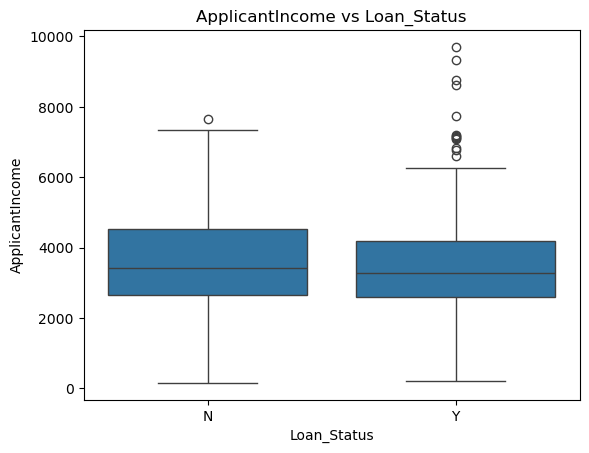

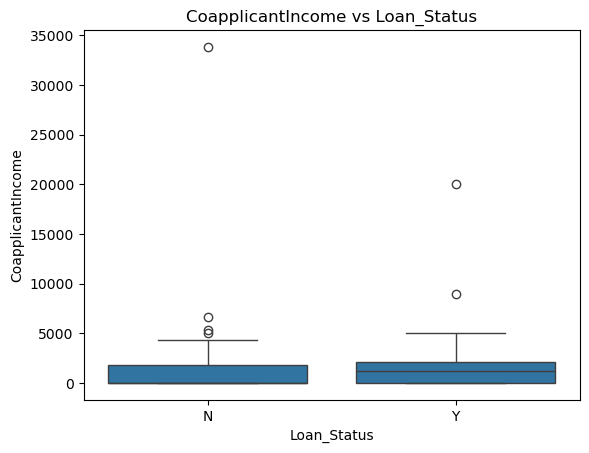

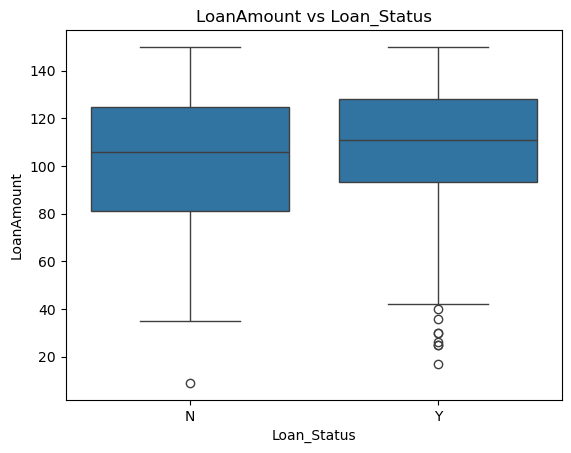

In [4]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

for col in num_cols:
    sns.boxplot(x='Loan_Status', y=col, data=df)
    plt.title(f"{col} vs Loan_Status")
    plt.show()

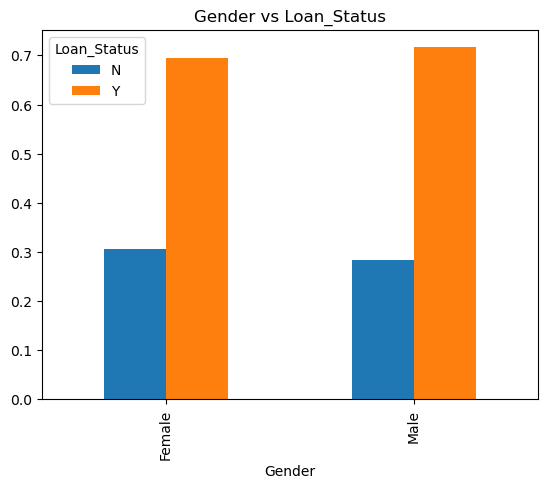

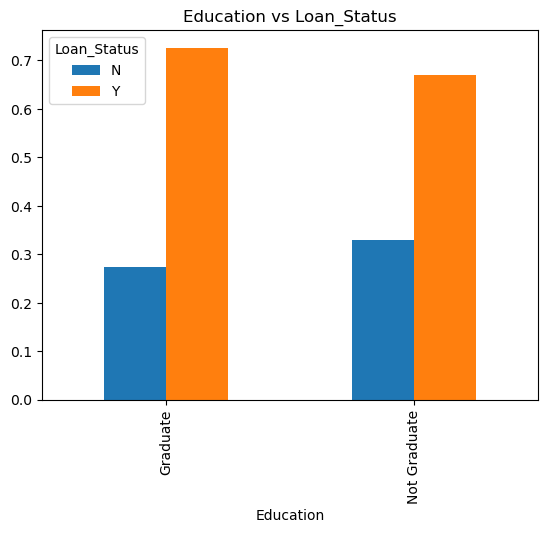

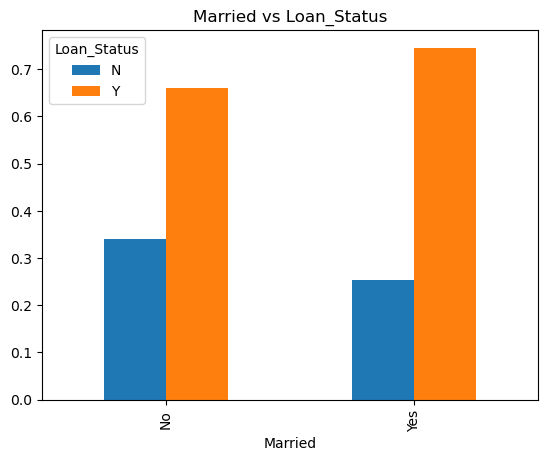

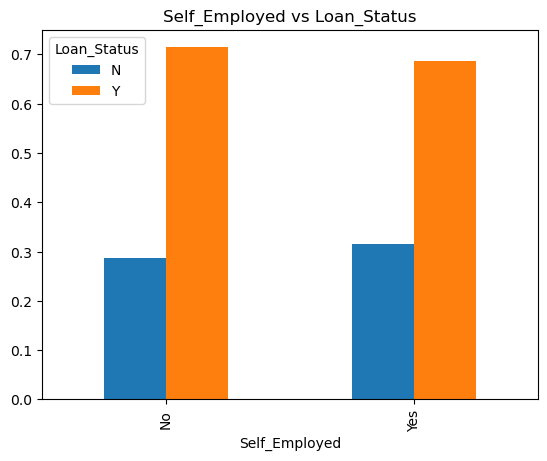

In [5]:
cat_cols = ['Gender', 'Education', 'Married', 'Self_Employed']

for col in cat_cols:
    pd.crosstab(df[col], df['Loan_Status'], normalize='index').plot(kind='bar')
    plt.title(f"{col} vs Loan_Status")
    plt.show()

In [6]:
df[num_cols].skew()

ApplicantIncome      1.119751
CoapplicantIncome    8.660692
LoanAmount          -0.804282
dtype: float64

In [7]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(col, "outliers:", outliers.shape[0])

ApplicantIncome outliers: 14
CoapplicantIncome outliers: 6
LoanAmount outliers: 7


In [8]:
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])

In [9]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_to_Income'] = df['LoanAmount'] / df['Total_Income']

In [11]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['Loan_to_Income'] = df['LoanAmount'] / df['Total_Income']

In [12]:
df['ApplicantIncome_log'] = np.log1p(df['ApplicantIncome'])
df['CoapplicantIncome_log'] = np.log1p(df['CoapplicantIncome'])
df['LoanAmount_log'] = np.log1p(df['LoanAmount'])

In [13]:
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [14]:
df = pd.get_dummies(df, drop_first=True)

In [15]:
df.drop(columns=['Loan_ID'], inplace=True, errors='ignore')

In [16]:
df.to_csv("loan_data_final.csv", index=False)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=2000, random_state=42))
])

pipe_lr.fit(X_train, y_train)

y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]
y_pred_lr = (y_prob_lr >= 0.5).astype(int)

print("LogReg ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

LogReg ROC-AUC: 0.8636363636363636
[[11 11]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        22
           1       0.83      1.00      0.91        55

    accuracy                           0.86        77
   macro avg       0.92      0.75      0.79        77
weighted avg       0.88      0.86      0.84        77



In [28]:
threshold = 0.4
y_pred_thresh = (y_prob >= threshold).astype(int)

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))

[[ 8 14]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        22
           1       0.80      1.00      0.89        55

    accuracy                           0.82        77
   macro avg       0.90      0.68      0.71        77
weighted avg       0.86      0.82      0.79        77



In [30]:
import pandas as pd
from sklearn.metrics import roc_auc_score, recall_score

pd.DataFrame({
    'Model': ['Logistic Regression'],
    'ROC_AUC': [roc_auc_score(y_test, y_prob_lr)],
    'Recall_Default_N': [recall_score(y_test, y_pred_lr, pos_label=0)],
    'Threshold': [0.5]
}).to_csv("logreg_summary.csv", index=False)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,
    min_samples_split=5,
    random_state=42
)

rf.fit(X_train, y_train)

y_prob_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = (y_prob_rf >= 0.5).astype(int)

print("RF ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

RF ROC-AUC: 0.8256198347107437
[[10 12]
 [ 1 54]]
              precision    recall  f1-score   support

           0       0.91      0.45      0.61        22
           1       0.82      0.98      0.89        55

    accuracy                           0.83        77
   macro avg       0.86      0.72      0.75        77
weighted avg       0.84      0.83      0.81        77



In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

y_prob_gb = gb.predict_proba(X_test)[:, 1]
y_pred_gb = (y_prob_gb >= 0.5).astype(int)

print("GB ROC-AUC:", roc_auc_score(y_test, y_prob_gb))
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


GB ROC-AUC: 0.8491735537190083
[[13  9]
 [ 0 55]]
              precision    recall  f1-score   support

           0       1.00      0.59      0.74        22
           1       0.86      1.00      0.92        55

    accuracy                           0.88        77
   macro avg       0.93      0.80      0.83        77
weighted avg       0.90      0.88      0.87        77



In [33]:
from sklearn.metrics import recall_score

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
    "ROC_AUC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_gb)
    ],
    "Recall_Default_N": [
        recall_score(y_test, y_pred_lr, pos_label=0),
        recall_score(y_test, y_pred_rf, pos_label=0),
        recall_score(y_test, y_pred_gb, pos_label=0)
    ]
})

results

,Model,ROC_AUC,Recall_Default_N
0,Logistic Regression,0.863636,0.500000
1,Random Forest,0.825620,0.454545
2,Gradient Boosting,0.849174,0.590909


In [34]:
for t in [0.3, 0.4, 0.5]:
    y_pred_t = (y_prob_gb >= t).astype(int)
    print("Threshold:", t)
    print(confusion_matrix(y_test, y_pred_t))

Threshold: 0.3
[[11 11]
 [ 0 55]]
Threshold: 0.4
[[11 11]
 [ 0 55]]
Threshold: 0.5
[[13  9]
 [ 0 55]]


In [ ]:
pd.DataFrame({
    "Actual": y_test,
    "Probability": y_prob_gb,
    "Prediction": y_pred_gb
}).to_csv("gb_final_predictions.csv", index=False)
